In [93]:
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [94]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [95]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


In [96]:
Y = labels
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400,)


In [97]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (240, 4096)
x_test:  (160, 4096)
y_train:  (240,)
y_test:  (160,)


In [98]:
class_name = ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')

([<matplotlib.axis.XTick at 0x7f170974e3a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39')])

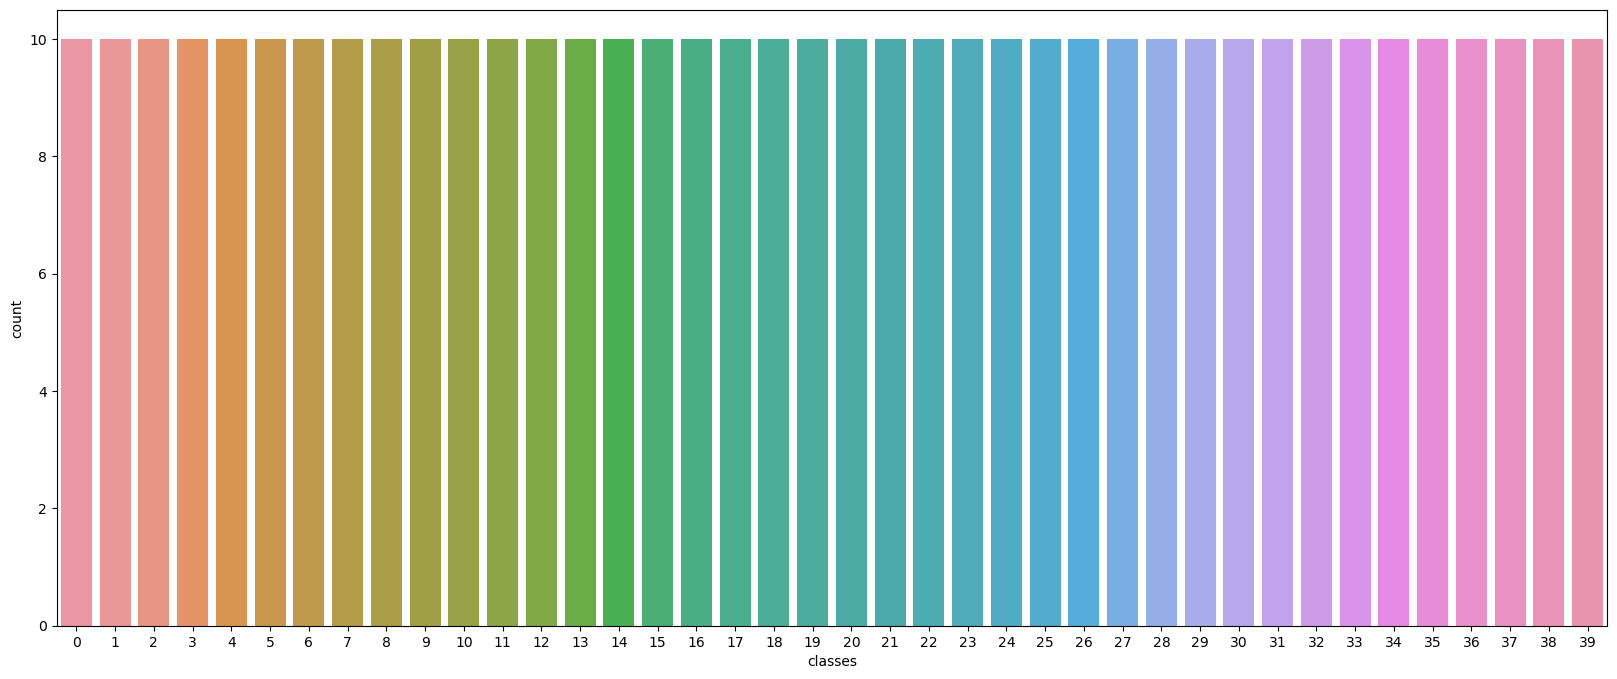

In [99]:
plt.figure(figsize = (20,8))
plt.xlabel('classes')
sns.countplot(x = Y)
x_pos = np.arange(len(class_name))
plt.xticks(x_pos, class_name)

In [100]:
print(x_train.shape)
print(x_test.shape)
xTrain = np.array(x_train.reshape(-1,64,64,1))
xTest = np.array(x_test.reshape(-1,64,64,1))
print(xTrain.shape)
print(xTest.shape)


(240, 4096)
(160, 4096)
(240, 64, 64, 1)
(160, 64, 64, 1)


In [101]:
lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(y_train)
yTest = lbTest.fit_transform(y_test)

In [102]:
from sklearn.decomposition import PCA

In [103]:
k=100
# running PCA provided with number of components to retain
pca=PCA(n_components=k,whiten= True)
x_transformed=pca.fit_transform(x_train)

x_train_pca=x_transformed.reshape(-1,10,10,1)
print(xTrain.shape)
print(x_train_pca.shape)


x_test_pca= pca.transform(x_test).reshape(-1,10,10,1)
print(xTest.shape)
print(x_test_pca.shape)


(240, 64, 64, 1)
(240, 10, 10, 1)
(160, 64, 64, 1)
(160, 10, 10, 1)


In [104]:
model = Sequential()
# camada de convolução 1
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(10,10,1) ))
#model.add(MaxPooling2D(pool_size = (2, 2)))

# camada de convolução 2
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.30))

# camada de convolução 3
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.30))



model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.30))
model.add(Dense(40, activation = 'softmax')) #40 - number of classes

In [105]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

In [106]:
# Let's use 15% of our training dataset to validate our model

num_rows = x_train_pca.shape[0]
print(num_rows)
val_percent = 0.15
val_size = int(num_rows * val_percent) #240 para validar os dados
train_size = num_rows - val_size  #23337 para dados de traino

xtrain_ds = x_train_pca[:train_size] #23337
xval_ds = x_train_pca[train_size:] #4118
ytrain_ds = yTrain[:train_size] #23337
yval_ds = yTrain[train_size:] #4118

240


In [107]:
history = model.fit(xtrain_ds, ytrain_ds, validation_data = (xval_ds, yval_ds), epochs=500, batch_size=128)

Epoch 1/500
2/2 [==============================] - 1s 222ms/step - loss: 3.7138 - accuracy: 0.0124 - val_loss: 3.6927 - val_accuracy: 0.0278
Epoch 2/500
2/2 [==============================] - 0s 58ms/step - loss: 3.6988 - accuracy: 0.0183 - val_loss: 3.6857 - val_accuracy: 0.0278
Epoch 3/500
2/2 [==============================] - 0s 57ms/step - loss: 3.6863 - accuracy: 0.0359 - val_loss: 3.6856 - val_accuracy: 0.0278
Epoch 4/500
2/2 [==============================] - 0s 63ms/step - loss: 3.6592 - accuracy: 0.0476 - val_loss: 3.6883 - val_accuracy: 0.0278
Epoch 5/500
2/2 [==============================] - 0s 63ms/step - loss: 3.6548 - accuracy: 0.0418 - val_loss: 3.6927 - val_accuracy: 0.0278
Epoch 6/500
2/2 [==============================] - 0s 61ms/step - loss: 3.6352 - accuracy: 0.0535 - val_loss: 3.6946 - val_accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 66ms/step - loss: 3.6334 - accuracy: 0.0450 - val_loss: 3.6948 - val_accuracy: 0.0000e+00
Epoch 8/500

Text(0.5, 1.0, 'Accurary Evolution (epochs=500; dropout=0.30)')

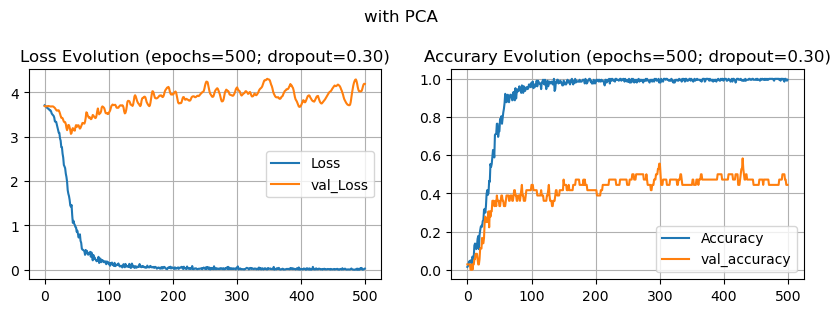

In [124]:
plt.style.use('default')
plt.figure(figsize = (10,6))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_Loss')
plt.legend()
plt.grid()
plt.title('Loss Evolution (epochs=500; dropout=0.30)')
plt.suptitle('with PCA ')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title('Accurary Evolution (epochs=500; dropout=0.30)')

In [115]:
predicted_classes = model.predict_classes(x_test_pca)
rounded_labels=np.argmax(yTest, axis=1)

print(predicted_classes)
print(y_test)

[19 15  8 20 31 27 17 25  9 28 30 35 23 10  9 10 22 11 26 23  6 17 39 32
 33 15 12 26  8 12  1 14 30 19 28  5 29  7 32 25 29 13 18 24 29  4  4 39
 21 13  1 34  9 24 33 19 38  5 26 14 28 12 27 38 32 26 19  9  3 34 13 19
 18 20 10  1 32  3 23  6 22 23 28 35 27 27 38 38  4  3  7 38 26 30 35 23
 30 38  1 12  1 10  9 21 30 25 23 11 21 15 30  2 26 21 36  6 16 18 12  6
 22 18 32  1 33 28  6 13  0 19  5 25 38 25  9 39 21  5 39 14 32  5 12 28
 13 17 25 39 16 22 26 36 16 24 22  5 14 19  2 38]
[34 15  8 12 31 27 17 25 34 28 30 35 23 10 37 10 11  1 26 25  0 17 39 32
 33 15 17 26  8 34  0 14 18 19 28  5 29  7 37 14 29 13 11 24 29  4  4 11
 21 13 25 27 36 24 33 19  7  5 26 14 35 12 11 38  0 26 31 38  3 34 13 36
 18 20 10  1 32  3 23  3 22 10 28  5 27  1 39 14  4  3  7 39 10 30 35  1
 30 38  1 20  1 10  9 21 30 35 24 11 21 15 30  2 26 21 36  6 17 32 11  6
 20 18  7  2 33 28  6 13 15 16  5 25 38 37 22 37 21 16 39 14 25  0  6  0
 13 17 37 37 16 22 26 36  7 24 22  8 36 19  0 38]


In [116]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(rounded_labels, predicted_classes)
print('Accuracy Score = ',acc_score) 

Accuracy Score =  0.625


In [117]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Reds):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # matriz de confusao
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # visualizacao
    fig, ax = plt.subplots(figsize=(15, 15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')

    # girar os rótulos e definir o alinhamento
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # loop sobre dimensoes de dados e criar anotacoes de texto
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 2000x2000 with 0 Axes>

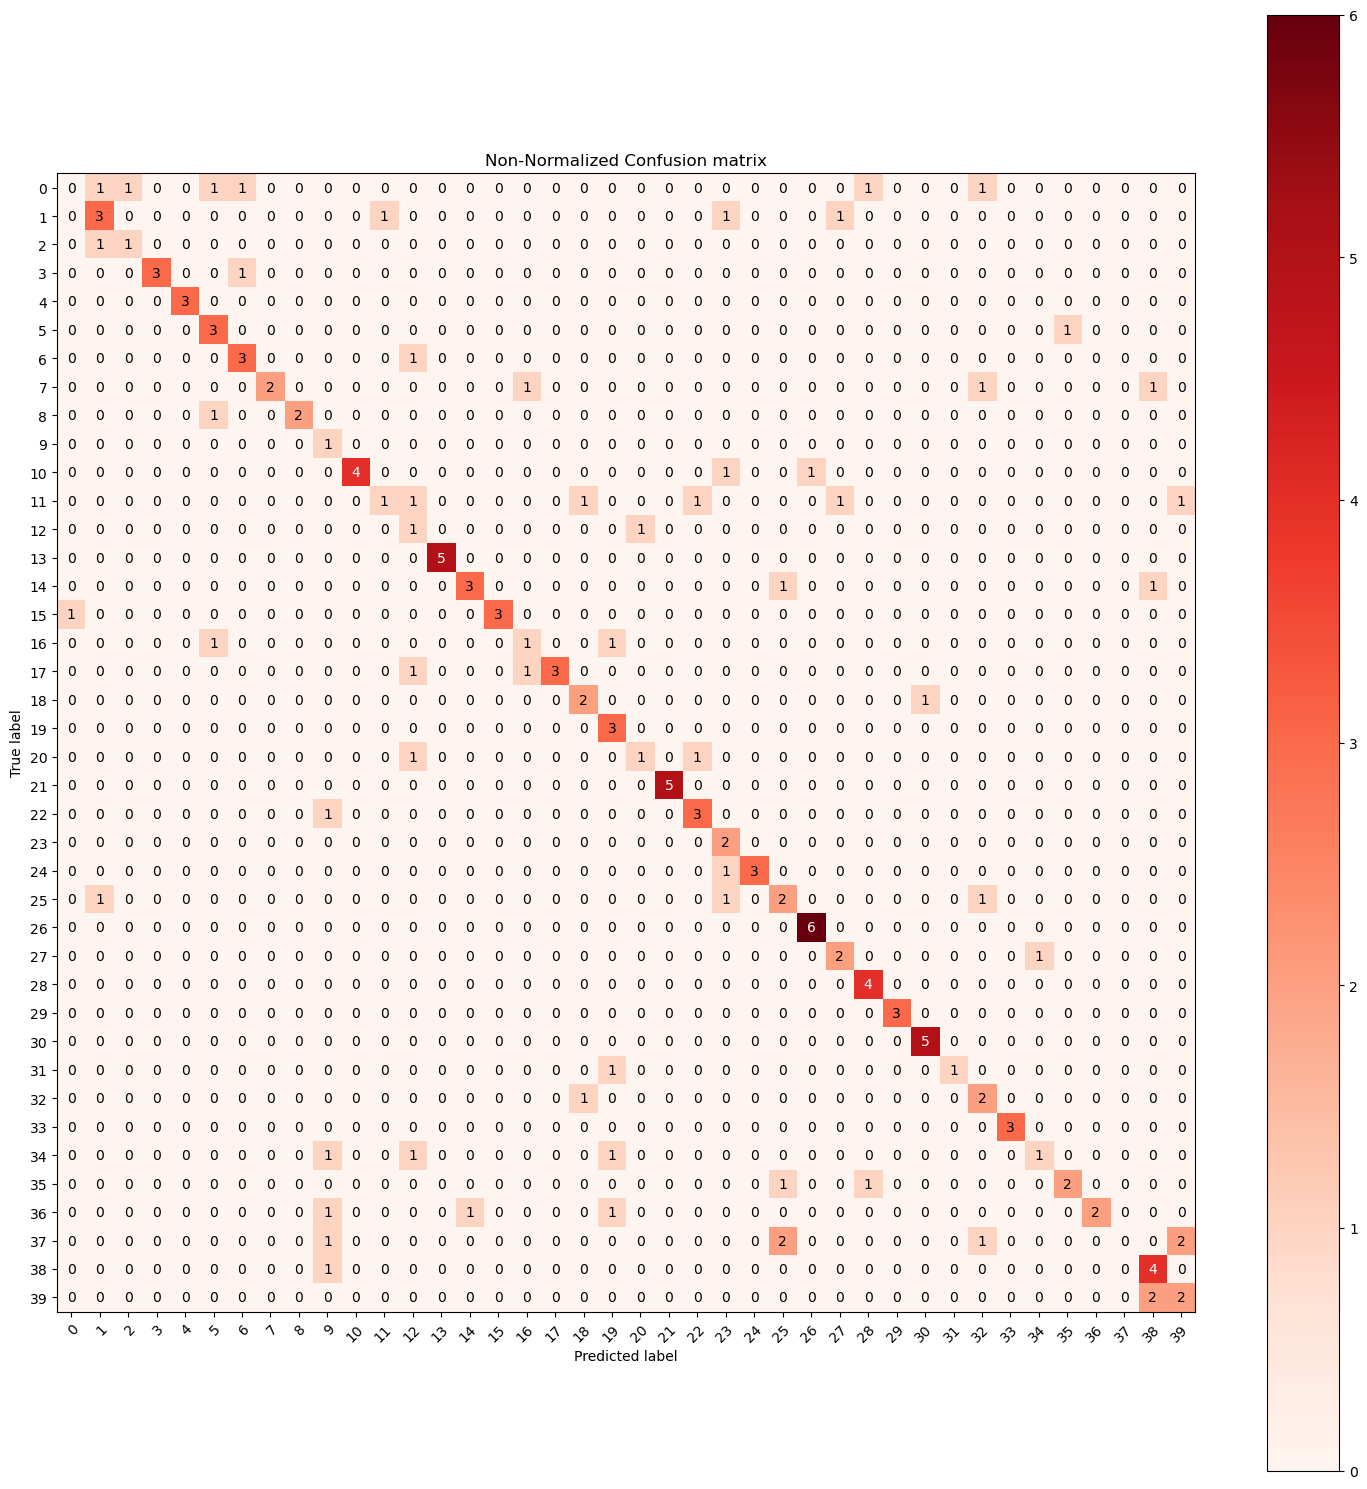

In [118]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 3500x3500 with 0 Axes>

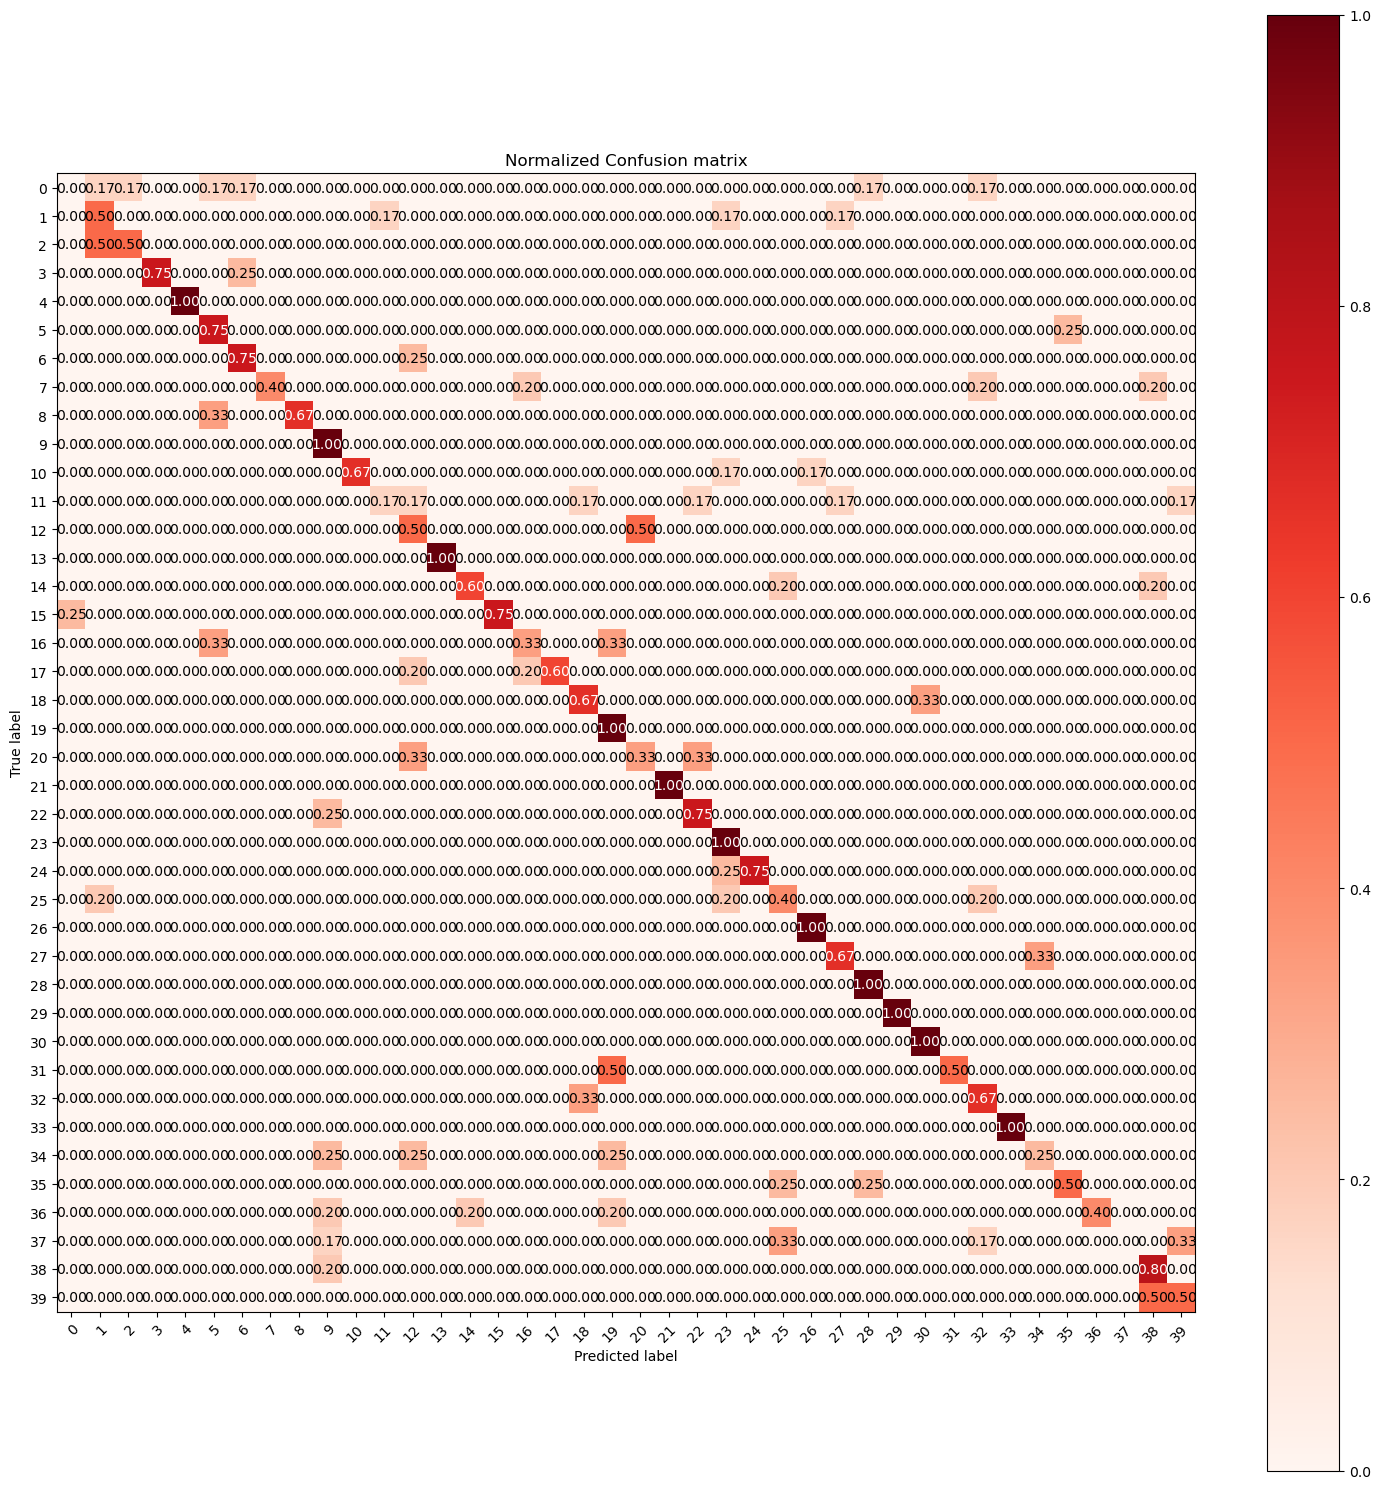

In [119]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, normalize=True, title='Normalized Confusion matrix')
plt.show()

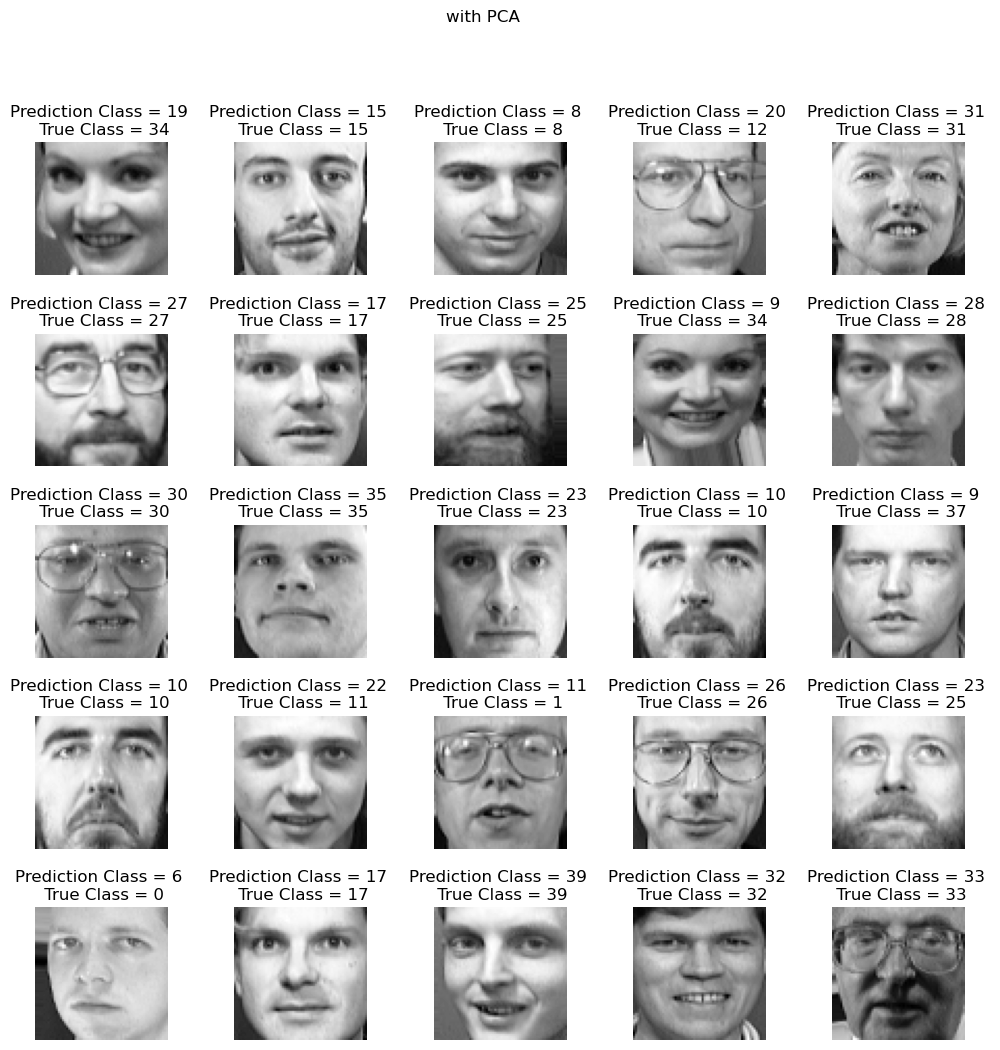

In [127]:
fig, axes = plt.subplots(5, 5, figsize = (12,12)) 
plt.suptitle('with PCA ')
axes = axes.ravel() 
for i in np.arange (0, 5*5):
    if (predicted_classes[i] >= 9):
        axes[i].imshow(xTest[i].reshape(64,64), cmap='gray') 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(predicted_classes[i], y_test[i])) 
        axes[i].axis('off') 
    else:
        axes[i].imshow(xTest[i].reshape(64,64), cmap='gray',) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(predicted_classes[i], y_test[i])) 
        axes[i].axis('off') 
plt.subplots_adjust(wspace = 0.5)